# Cross-entropy, geometric interpretation, and implementation

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Sep 23, 2025 17:10

# Preamble

## Message of the Day

<https://www.youtube.com/watch?v=I_cvKK7LanI>

[AI’s “Significant Effect” on Entry-Level
Work](https://www.youtube.com/watch?v=I_cvKK7LanI), TIME, 2025-09-05.
(13m 55s)

TIME conducted interviews with the authors of a recent report from the
**Stanford Digital Economy Lab**, titled “Canaries in the Coal Mine? Six
Facts about the Recent Employment Effects of Artificial Intelligence.”
The report is available
[here](https://www.rivista.ai/wp-content/uploads/2025/09/1756729755699.pdf)
and here is the abstract:

> This paper examines changes in the labor market for occupations
> exposed to generative artificial intelligence using high-frequency
> administrative data from the largest payroll software provider in the
> United States. We present six facts that characterize these shifts. We
> find that since the widespread adoption of generative AI, early-career
> workers (ages 22-25) in the most AI-exposed occupations have
> experienced a 13 percent relative decline in employment even after
> controlling for firm-level shocks. In contrast, employment for workers
> in less exposed fields and more experienced workers in the same
> occupations has remained stable or continued to grow. We also find
> that adjustments occur primarily through employment rather than
> compensation. Furthermore, employment declines are concentrated in
> occupations where AI is more likely to automate, ratherthanaugment,
> humanlabor. Ourresultsarerobusttoalternativeexplanations, such as
> excluding technology-related firms and excluding occupations amenable
> to remote work. These six facts provide early, large-scale evidence
> consistent with the hypothesis that the AI revolution is beginning to
> have a significant and disproportionate impact on entry-level workers
> in the American labor market.

## Message of the Day (continued)

<https://www.youtube.com/watch?v=p_kF_SDB0-c>

[How AI is changing the job
market](https://www.youtube.com/watch?v=p_kF_SDB0-c), What in the World
podcast, BBC World Service, 2025-09-16.

## Learning Outcomes

By the end of this presentation, you should be able to:

-   **Differentiate** between MSE and cross-entropy as loss functions.
-   **Relate** maximum likelihood estimation to parameter learning in
    logistic regression.
-   **Interpret** the geometric view of logistic regression as a linear
    decision boundary.
-   **Implement** logistic regression with gradient descent on simple
    data.

# Linear Regression

## Problem

-   **General Case:** $P(y = k \mid x, \theta)$, where $k$ is a class
    label.
-   **Binary Case**: $y \in {0,1}$
    -   **Predict** $P(y = 1 \mid x, \theta)$

For a new instance $x_{\textrm{new}}$, determine the probability that it
belongs to class $k$, denoted as
$P(y = k \mid x_{\textrm{new}}, \theta)$.

## Logistic Regression

The **Logistic Regression** model is defined as:

$$
  h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
  $$

-   **Predictions** are made as follows:

-   $y_i = 0$, if $h_\theta(x_i) < 0.5$

-   $y_i = 1$, if $h_\theta(x_i) \geq 0.5$

The problem is formulated as a **binary classification** task, wherein
the model presumes that the classes are separable by a **linear
function** within the feature space.

In the previous lecture, we considered an example wherein **logistic
regression** was used to classify **handwritten digits**.

-   The classification problem was addressed using a **one-vs-rest**
    strategy, which involved training ten separate logistic regression
    models, each dedicated to recognizing a specific digit.
-   Each model consisted of **65 parameters**: **one bias** term and
    **64 weights**. Each **weight** corresponded to a **pixel** (or
    **attribute**) of a $64 \times 64$ pixel image.
-   This method demonstrated an excellent performance, achieving an
    overall accuracy of 0.97.
-   Analyzing the weights provided insights into the areas of the image
    to which the model was most responsive (what does it pay attention
    to?).

The model presented above is expressed in its vectorized form, allowing
it to be applied to problems involving multiple attributes. In the
context of recognizing handwritten digits, the model utilizes 64
attributes, corresponding to individual pixels. The function $\sigma$
employed in this model is the logistic, or sigmoid, function.

# Loss Function

## Model Overview

-   Our model is expressed in a vectorized form as:

    $$
    h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
    $$

-   **Prediction**:

    -   Assign $y_i = 0$, if $h_\theta(x_i) < 0.5$; $y_i = 1$, if
        $h_\theta(x_i) \geq 0.5$

-   The parameter vector $\theta$ is optimized using **gradient
    descent**.

-   Which **loss function** should be used and why?

In logistic regression, the output is regarded as a probability, with
particular emphasis on the interpretation process.

## Remarks

-   In constructing machine learning models with libraries like
    `scikit-learn` or `keras`, one has to **select a loss function** or
    **accept the default one**.

-   Initially, the **terminology can be confusing**, as identical
    functions may be referenced by various names.

-   Our aim is to **elucidate these complexities**.

-   It is actually **not that complicated**!

## Parameter Estimation

-   Logistic regression is **statistical model**.

-   Its output is $\hat{y} = P(y = 1 | x, \theta)$.

-   $P(y = 0 | x, \theta) = 1 - \hat{y}$.

-   Assumes that $y$ values come from a **Bernoulli distribution**.

-   $\theta$ is commonly found by **Maximum Likelihood Estimation**.

The expressions $\hat{y}$, $h_\theta(x_i)$, and $\sigma(\theta x_i)$
represent the same concept, albeit at varying levels of abstraction and
specificity.

## Parameter Estimation

**Maximum Likelihood Estimation (MLE)** is a statistical method used to
estimate the parameters of a probabilistic model.

It identifies the parameter values that maximize the **likelihood
function**, which measures how well the model explains the observed
data.

## Likelihood Function

Assuming the $y$ values are *independent and identically distributed
(i.i.d.)*, the **likelihood function** is expressed as the **product of
individual probabilities**.

In other words, given our data, $\{(x_i, y_i)\}_{i=1}^N$, the likelihood
function is given by this equation. $$
\mathcal{L}(\theta) = \prod_{i=1}^{N} P(y_i \mid x_i, \theta)
$$

## Maximum Likelihood

$$
  \hat{\theta} = \underset{\theta \in \Theta}{\arg \max} \mathcal{L}(\theta) =  \underset{\theta \in \Theta}{\arg \max}  \prod_{i=1}^{N} P(y_i \mid x_i, \theta)
$$

-   **Observations**:

    1.  **Maximizing** a function is equivalent to **minimizing its
        negative.**
    2.  The **logarithm of a product** equals the **sum of its
        logarithms**.

## Negative Log-Likelihood

**Maximum likelihood** $$
  \hat{\theta} = \underset{\theta \in \Theta}{\arg \max} \mathcal{L}(\theta) = \underset{\theta \in \Theta}{\arg \max}  \prod_{i=1}^{N} P(y_i \mid x_i, \theta)
$$

becomes **negative log-likelihood**

$$
\hat{\theta} = \underset{\theta \in \Theta}{\arg \min} - \log \mathcal{L(\theta)} = \underset{\theta \in \Theta}{\arg \min} - \log \prod_{i=1}^{N} P(y_i \mid x_i, \theta) = \underset{\theta \in \Theta}{\arg \min} - \sum_{i=1}^{N} \log P(y_i \mid x_i, \theta)
$$

## Mathematical Reformulation

For binary outcomes, the probability $P(y \mid x, \theta)$ is:

$$
P(y \mid x, \theta) =
\begin{cases}
\sigma(\theta x), & \text{if}\ y = 1 \\
1 - \sigma(\theta x), & \text{if}\ y = 0
\end{cases}
$$

. . .

This can be compactly expressed as:

$$
P(y \mid x, \theta) = \sigma(\theta x)^y (1 - \sigma(\theta x))^{1-y}
$$

This **“mathematical hack”** validates the rationale for the **label
encoding**.

## Loss Function

We are now ready to write our **loss function**.

$$
J(\theta) = - \log \mathcal{L(\theta)} = - \sum_{i=1}^{N} \log P(y_i \mid x_i, \theta)
$$ where
$P(y \mid x, \theta) = \sigma(\theta x)^y (1 - \sigma(\theta x))^{1-y}$.

Consequently, $$
J(\theta) = - \sum_{i=1}^{N} \log [ \sigma(\theta x_i)^{y_i} (1 - \sigma(\theta x_i))^{1-y_i} ]
$$

## Loss Function (continued)

Simplifying the equation. $$
J(\theta) = - \sum_{i=1}^{N} \log [ \sigma(\theta x_i)^{y_i} (1 - \sigma(\theta x_i))^{1-y_i} ]
$$ by distributing the $\log$ into the square parenthesis. $$
J(\theta) = - \sum_{i=1}^{N} [ \log \sigma(\theta x_i)^{y_i} + \log (1 - \sigma(\theta x_i))^{1-y_i} ]
$$

## Loss Function (continued)

Simplifying the equation further. $$
J(\theta) = - \sum_{i=1}^{N} [ \log \sigma(\theta x_i)^{y_i} + \log (1 - \sigma(\theta x_i))^{1-y_i} ]
$$ by moving the exponents in front of the $\log$s.

$$
J(\theta) = - \sum_{i=1}^{N} [ y_i \log \sigma(\theta x_i) + (1-y_i) \log (1 - \sigma(\theta x_i)) ]
$$

The rationale for these additional simplifications will be elucidated
shortly.

## One More Thing

-   Decision tree algorithms often employ **entropy**, a measure from
    **information theory**, to evaluate the quality of splits or
    partitions in decision rules.
-   Entropy quantifies the uncertainty or impurity associated with the
    potential outcomes of a random variable.

## Entropy

**Entropy** in information theory quantifies the **uncertainty** or
unpredictability of a random variable’s possible outcomes. It measures
the average amount of information produced by a stochastic source of
data and is typically expressed in bits for binary systems. The entropy
$H$ of a discrete random variable $X$ with possible outcomes
$\{x_1, x_2, \ldots, x_n\}$ and probability mass function $P(X)$ is
given by:

$$
H(X) = -\sum_{i=1}^n P(x_i) \log_2 P(x_i)
$$

## Cross-Entropy

**Cross-entropy** quantifies the **difference between two probability
distributions**, typically the **true distribution** and a **predicted
distribution**.

$$
H(p, q) = -\sum_{i} p(x_i) \log q(x_i) 
$$ where $p(x_i)$ is the true probability distribution, and $q(x_i)$ is
the predicted probability distribution.

## Cross-Entropy

-   Consider $y$ as the true probability distribution and $\hat{y}$ as
    the predicted probability distribution.
-   Cross-entropy quantifies the **discrepancy** between these two
    distributions.

## Cross-Entropy

Consider the **negative log-likelihood loss** function:

$$
J(\theta) = - \sum_{i=1}^{N} \left[ y_i \log \sigma(\theta x_i) + (1-y_i) \log (1 - \sigma(\theta x_i)) \right]
$$

By substituting $\sigma(\theta x_i)$ with $\hat{y_i}$, the function
becomes:

$$
J(\theta) = - \sum_{i=1}^{N} \left[ y_i \log \hat{y_i} + (1-y_i) \log (1 - \hat{y_i}) \right]
$$

This expression illustrates that the **negative log-likelihood** is
optimized by minimizing the **cross-entropy**.

**Cross-entropy**, **log loss**, and n**egative log-likelihood** refer
to the same concept.

Interpret the final equation as applying to all examples from 1 to $N$
and all classes from 1 to $k$. Here, $k=0$ because we are addressing a
binary classification problem.

## For Each Example

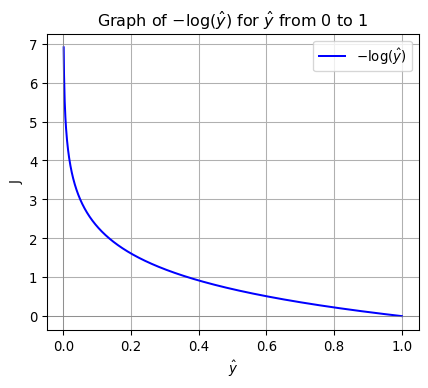

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

# Generate an array of p values from just above 0 to 1
p_values = np.linspace(0.001, 1, 1000)

# Compute the natural logarithm of each p value
ln_p_values = - np.log(p_values)

# Plot the graph
plt.figure(figsize=(5, 4))
plt.plot(p_values, ln_p_values, label=r'$-\log(\hat{y})$', color='b')

# Add labels and title
plt.xlabel(r'$\hat{y}$')
plt.ylabel(r'J')
plt.title(r'Graph of $-\log(\hat{y})$ for $\hat{y}$ from 0 to 1')
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='gray', lw=0.5)  # Add vertical line at x=0

# Display the plot
plt.legend()
plt.show()

$$
J(\theta) = - \sum_{i=1}^{N} \left[ y_i \log \hat{y_i} + (1-y_i) \log (1 - \hat{y_i}) \right]
$$

For each example:

-   Only one of the two terms in the summation is not zero.
-   $1 - \hat{y_i}$ is $P(y = 0 \mid x, \theta)$.
-   As $\hat{y_i}$ tends to 1.0, $- \log(\hat{y})$ tends to zero.
-   As $\hat{y_i}$ tends to 0.0, indicating an incorrect prediction,
    $- \log(\hat{y})$ tends to $\infty$.
-   This substantial penalty allows cross-entropy loss to converge more
    quickly than mean squared error.

## Remarks

-   Cross-entropy loss is particularly well-suited for **probabilistic
    classification tasks** due to its alignment with maximum likelihood
    estimation.

-   In logistic regression, **cross-entropy loss preserves convexity**,
    contrasting with the non-convex nature of mean squared error
    (MSE)[1].

We will revisite cross-entropy loss when studying deep learning,
especially in conjunction with the softmax function.

If you train **logistic regression** with the **mean squared error
(MSE)** loss:

-   The composition of the **sigmoid** (nonlinear, S-shaped) with the
    **quadratic loss** produces a **non-convex objective**.
-   This leads to multiple local minima and poor optimization behavior.
-   By contrast, using the **log-loss (cross-entropy)** yields a
    **convex objective** in the parameters, making optimization
    well-behaved with gradient methods.

## Remarks

-   For classification problems, cross-entropy loss often achieves
    **faster convergence** compared to MSE, enhancing model efficiency.

-   Within deep learning architectures, MSE can exacerbate the
    **vanishing gradient problem**, an issue we will address in a
    subsequent discussion.

## Why not MSE as a Loss Function?

<https://www.youtube.com/watch?v=m0ZeT1EWjjI>

## What is the Difference?

<https://www.youtube.com/watch?v=ziq967YrSsc>

# Geometric Interpretation

## Geometric Interpretation

-   **Do you** recognize this equation? $$
    w_1 x_1 + w_2 x_2 + \ldots + w_D x_2
    $$

-   This is the **dot product** of $\mathbf{w}$ and $\mathbf{x}$,
    $\mathbf{w} \cdot \mathbf{x}$.

-   What is the **geometric interpretation** of the dot product?

. . .

$$
\mathbf{w} \cdot \mathbf{x} = \|\mathbf{w}\| \|\mathbf{x}\| \cos \theta
$$

In certain contexts, it is advantageous to use $w$ in place of $\theta$.

## Geometric Interpretation

$$
\mathbf{w} \cdot \mathbf{x} = \|\mathbf{w}\| \|\mathbf{x}\| \cos \theta
$$

-   The **dot product** determines the **angle $(\theta)$ between
    vectors**.

-   It **quantifies** how much one vector extends in the direction of
    another.

-   Its value is zero, if the vectors are **perpendicular**
    $(\theta = 90^\circ)$.

## Geometric Interpretation

-   **Logistic regression** uses a linear combination of the input
    features, $\mathbf{w} \cdot \mathbf{x} + b$, as the argument to the
    sigmoid (logistic) function.

-   Geometrically, $\mathbf{w}$ can be viewed as a **vector normal to a
    hyperplane in the feature space**, and any point $\mathbf{x}$ is
    projected onto $\mathbf{w}$ via the dot product
    $\mathbf{w} \cdot \mathbf{x}$.

## Geometric Interpretation

-   The **decision boundary** is where this linear combination equals
    zero, i.e., $\mathbf{w} \cdot \mathbf{x} + b = 0$.

-   Points on one side of the boundary have a **positive dot product**
    and are more likely to be classified as the positive class (1).

-   Points on the other side have a **negative dot product** and are
    more likely to be in the opposite class (0).

-   The **sigmoid function** simply turns this **signed distance** into
    a **probability** between 0 and 1.

## Logistic Function

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

-   As $t \to \infty$, $e^{-t} \to 0$, so $\sigma(t) \to 1$.
-   As $t \to -\infty$, $e^{-t} \to \infty$, making the denominator
    approach infinity, so $\sigma(t) \to 0$.
-   When $t = 0$, $e^{-t} = 0$, resulting in a denominator of 2, so
    $\sigma(t) = 0.5$.

``` python
# Sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# Generate t values
t = np.linspace(-6, 6, 1000)

# Compute y values for the sigmoid function
sigma = sigmoid(t)

# Create a figure
fig, ax = plt.subplots()
ax.plot(t, sigma, color='blue', linewidth=2)  # Keep the curve opaque

# Draw vertical axis at x = 0
ax.axvline(x=0, color='black', linewidth=1)

# Add labels on the vertical axis
ax.set_yticks([0, 0.5, 1.0])

# Add labels to the axes
ax.set_xlabel('t')
ax.set_ylabel(r'$\sigma(t)$')

plt.grid(True)
plt.show()
```

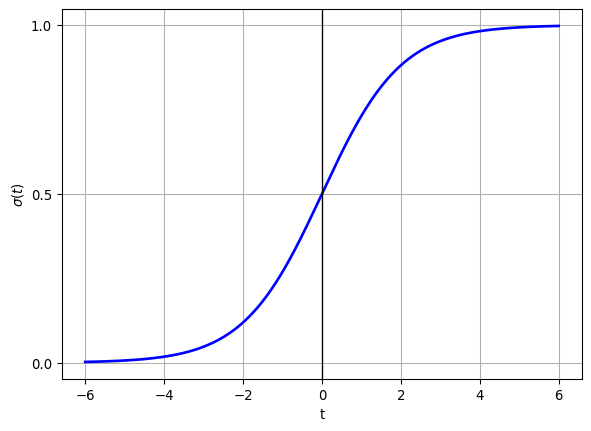

## What’s special about e?

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

-   Instead of $e$, we might have used another constant, say 2.

-   **Derivative Simplicity**: For the logistic function
    $\sigma(x) = \tfrac{1}{1 + e^{-x}}$, the derivative simplifies to
    $\sigma'(x) = \sigma(x)(1 - \sigma(x))$. This elegant form arises
    because the exponential base $e$ has the unique property that
    $\tfrac{d}{dx} e^x = e^x$, avoiding an extra multiplicative
    constant.

``` python
import math

def logistic(x, e):
    """Compute a modified logistic function using b rather than e."""
    return 1 / (1 + np.power(e, -x))

# Define a range for x values.
x = np.linspace(-6, 6, 400)

# Plot 1: Varying e.
plt.figure(figsize=(8, 6))
e_values = [2, math.e, 4, 8, 16]  # different steepness values

for e in e_values:
    plt.plot(x, logistic(x, e), label=f'e = {e}')
plt.title('Effect of Varying e')
plt.xlabel('x')
plt.ylabel(r'$\frac{1}{1+e^{-x}}$')
plt.legend()
plt.grid(True)
```

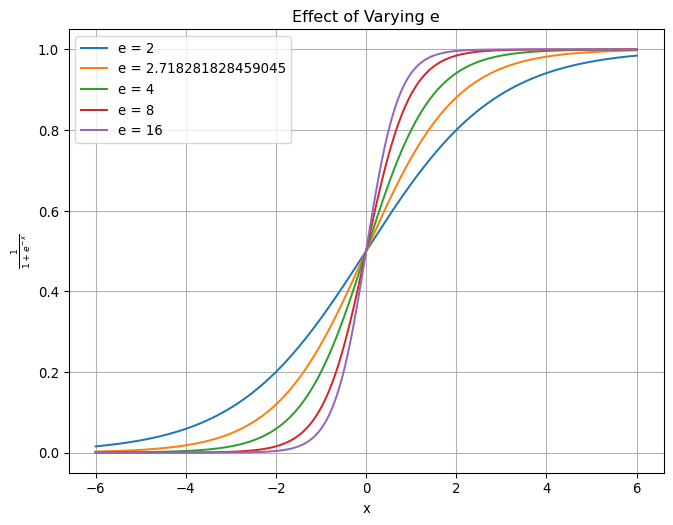

In the context of logistic regression, the choice of the mathematical
constant $e$ is not arbitrary but is supported by several compelling
mathematical justifications. These justifications primarily relate to
the harmonious integration of the logistic function with other
mathematical frameworks. Although our primary focus was to visually
demonstrate the potential implications of substituting a different
constant, the inherent advantages of using $e$ become evident upon
closer examination of its mathematical properties and how they
facilitate seamless integration with existing theories and models.

## Varying w

$$
  \sigma(wx + b)
$$

``` python
def logistic(x, w, b):
    """Compute the logistic function with parameters w and b."""
    return 1 / (1 + np.exp(-(w * x + b)))

# Define a range for x values.
x = np.linspace(-10, 10, 400)

# Plot 1: Varying w (steepness) with b fixed at 0.
plt.figure(figsize=(8, 6))
w_values = [0.5, 1, 2, 5]  # different steepness values
b = 0  # fixed bias

for w in w_values:
    plt.plot(x, logistic(x, w, b), label=f'w = {w}, b = {b}')
plt.title('Effect of Varying w (with b = 0)')
plt.xlabel('x')
plt.ylabel(r'$\sigma(wx+b)$')
plt.legend()
plt.grid(True)
plt.show()
```

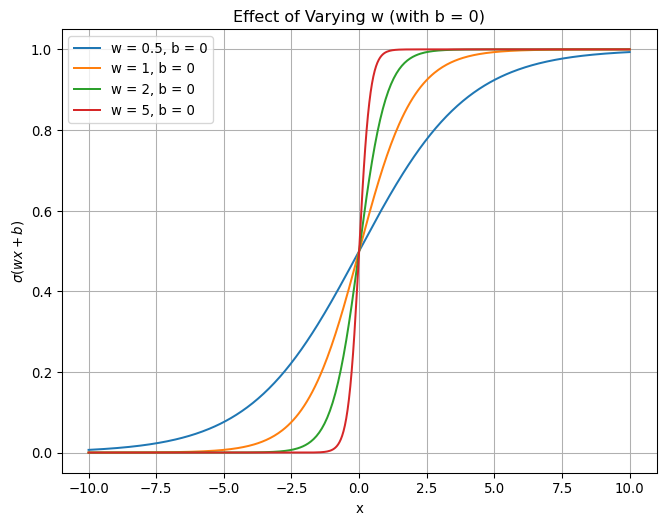

## Varying b

$$
  \sigma(wx + b)
$$

``` python
# Plot 2: Varying b (horizontal shift) with w fixed at 1.
plt.figure(figsize=(8, 6))
w = 1  # fixed steepness
b_values = [-5, -2, 0, 2, 5]  # different bias values

for b in b_values:
    plt.plot(x, logistic(x, w, b), label=f'w = {w}, b = {b}')
plt.title('Effect of Varying b (with w = 1)')
plt.xlabel('x')
plt.ylabel(r'$\sigma(wx+b)$')
plt.legend()
plt.grid(True)

plt.show()
```

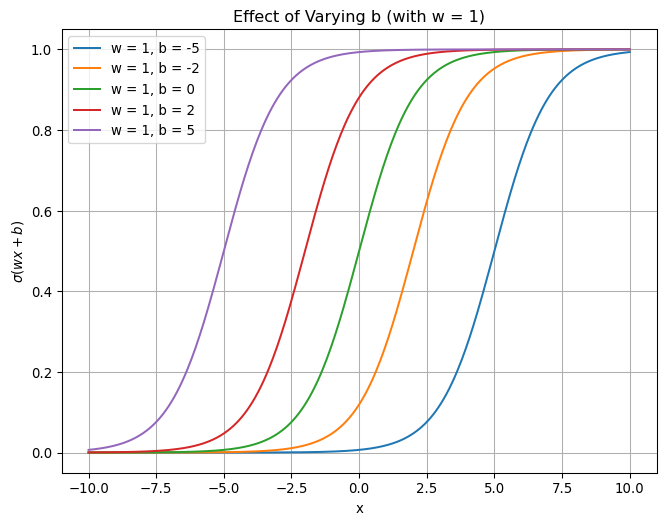

# Implementation

## Implementation: Generating Data

[1] In linear regression, mean squared error loss is convex.

In [7]:
# Generate synthetic data for a binary classification problem

m = 100  # number of examples
d = 2    # number of featues

X = np.random.randn(m, d)

# Define labels using a linear decision boundary with some noise:

noise = 0.5 * np.random.randn(m)

y = (X[:, 0] + X[:, 1] + noise > 0).astype(int)

## Implementation: Vizualization

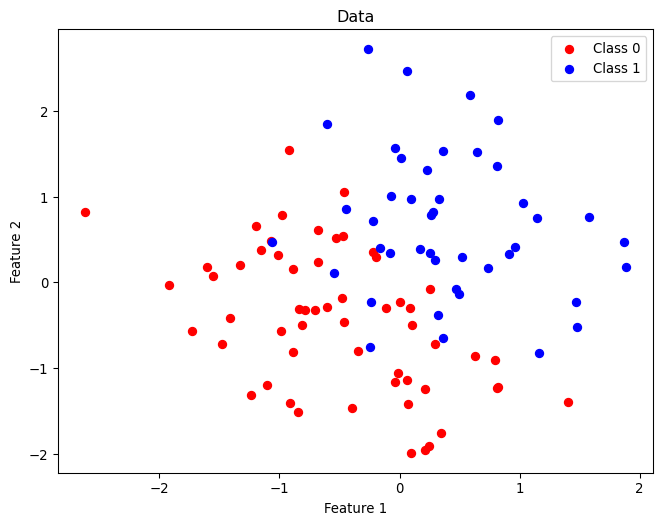

In [8]:
# Visualize the decision boundary along with the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data")
plt.legend()
plt.show()

## Implementation: Cost Function

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function: binary cross-entropy
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient of the cost function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h - y)
    return grad

## Implementation: Logistic Regression

In [10]:
# Logistic regression training using gradient descent
def logistic_regression(X, y, learning_rate=0.1, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
        theta -= learning_rate * gradient(theta, X, y)
        cost_history.append(cost_function(theta, X, y))
        
    return theta, cost_history

## Training

In [11]:
# Add intercept term (bias)
X_with_intercept = np.hstack([np.ones((m, 1)), X])

# Train the logistic regression model
theta, cost_history = logistic_regression(X_with_intercept, y, learning_rate=0.1, iterations=1000)

print("Optimized theta:", theta)

Optimized theta: [-0.28840995  2.80390104  2.45238752]

## Cost Function Convergence

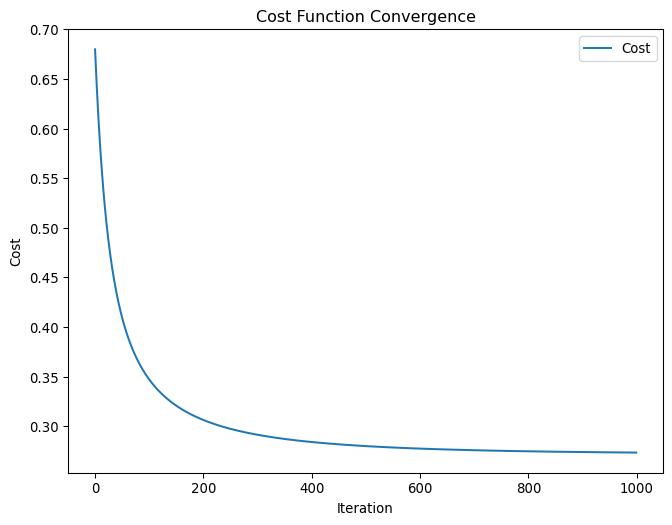

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(cost_history, label="Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

## Decision Boundary and Data Points

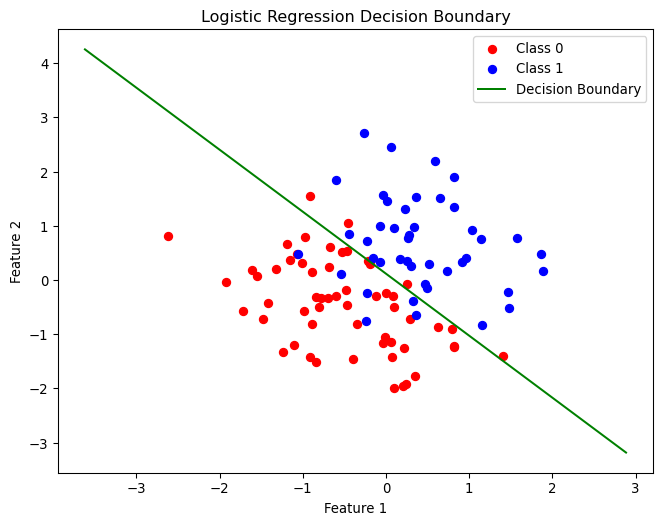

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0
x_vals = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
plt.plot(x_vals, y_vals, label='Decision Boundary', color='green')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

## Implementation (continued)

In [14]:
# Predict function: returns class labels and probabilities for new data
def predict(theta, X, threshold=0.5):
    probs = sigmoid(X.dot(theta))
    return (probs >= threshold).astype(int), probs

## Predictions

In [15]:
# New examples must include the intercept term.

# Negative example (likely class 0): Choose a point far in the negative quadrant.
example_neg = np.array([1, -3, -3])

# Positive example (likely class 1): Choose a point far in the positive quadrant.
example_pos = np.array([1, 3, 3])

# Near decision boundary: Choose x1 = 0 and compute x2 from the decision boundary equation.
x1_near = 0
x2_near = -(theta[0] + theta[1] * x1_near) / theta[2]
example_near = np.array([1, x1_near, x2_near])

In the given example, each data point is characterized by two primary
features. However, the representation includes three components. Why?

This discrepancy arises from an earlier discussed mathematical
technique, where each instance is augmented with an additional term,
$x_i^{(0)} = 1$. This augmentation facilitates the expression of the
model in a vectorized format, enhancing computational efficiency and
simplicity.

## Predictions (continued)

In [16]:
# Combine the examples into one array for prediction.
new_examples = np.vstack([example_neg, example_pos, example_near])

labels, probabilities = predict(theta, new_examples)

print("\nPredictions on new examples:")

print("Negative example {} -> Prediction: {} (Probability: {:.4f})".format(example_neg[1:], labels[0], probabilities[0]))

print("Positive example {} -> Prediction: {} (Probability: {:.4f})".format(example_pos[1:], labels[1], probabilities[1]))

print("Near-boundary example {} -> Prediction: {} (Probability: {:.4f})".format(example_near[1:], labels[2], probabilities[2]))


Predictions on new examples:
Negative example [-3 -3] -> Prediction: 0 (Probability: 0.0000)
Positive example [3 3] -> Prediction: 1 (Probability: 1.0000)
Near-boundary example [0.         0.11760374] -> Prediction: 1 (Probability: 0.5000)

## Visualizing the Weight Vector

In the previous lecture, we established that **logistic regression**
determines a **weight vector** that is **orthogonal** to the **decision
boundary**.

Conversely, the **decision boundary** itself is **orthogonal** to the
**weight vector**, which is derived through gradient descent
optimization.

## Visualizing the Weight Vector

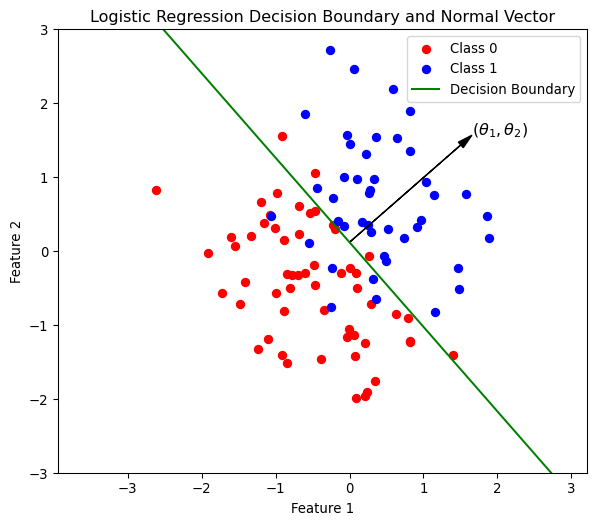

In [17]:
# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0
x_vals = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
plt.plot(x_vals, y_vals, label='Decision Boundary', color='green')

# --- Draw the normal vector ---
# The normal vector is (theta[1], theta[2]).
# Choose a reference point on the decision boundary. Here, we use x1 = 0:
x_ref = 0
y_ref = -theta[0] / theta[2]  # when x1=0, theta0 + theta2*x2=0  =>  x2=-theta0/theta2

# Create the normal vector from (theta[1], theta[2]).
normal = np.array([theta[1], theta[2]])

# Normalize and scale for display
normal_norm = np.linalg.norm(normal)
if normal_norm != 0:
    normal_unit = normal / normal_norm
else:
    normal_unit = normal
scale = 2  # adjust scale as needed
normal_display = normal_unit * scale

# Draw an arrow starting at the reference point
plt.arrow(x_ref, y_ref, normal_display[0], normal_display[1],
          head_width=0.1, head_length=0.2, fc='black', ec='black')
plt.text(x_ref + normal_display[0]*1.1, y_ref + normal_display[1]*1.1, 
         r'$(\theta_1, \theta_2)$', color='black', fontsize=12)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary and Normal Vector")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(-3, 3)
plt.show()

## Near the Decision Boundary

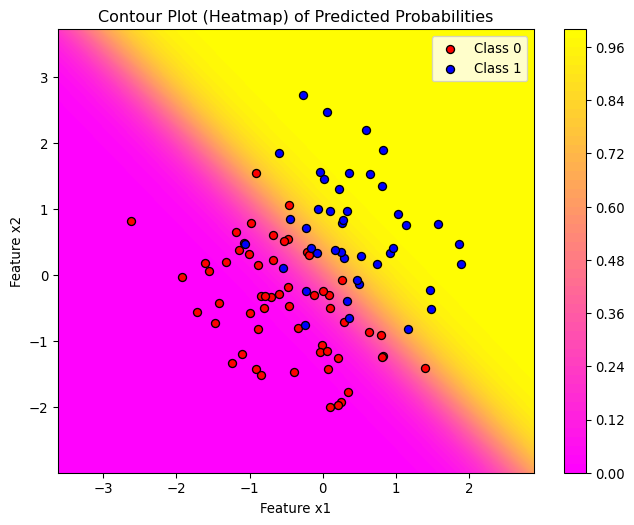

In [18]:
# --- Visualization Setup ---
# Create a grid over the feature space
x1_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2_range = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)

# Construct the grid input (with intercept) for predictions
grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]
# Compute predicted probabilities over the grid
probs = sigmoid(grid.dot(theta)).reshape(xx1.shape)
# --- Approach 2: 2D Contour (Heatmap) Plot ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx1, xx2, probs, cmap='spring', levels=50)
plt.colorbar(contour)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Contour Plot (Heatmap) of Predicted Probabilities')
# Overlay training data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', edgecolor='k', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', edgecolor='k', label='Class 1')
plt.legend()
plt.show()

## Near the Decision Boundary

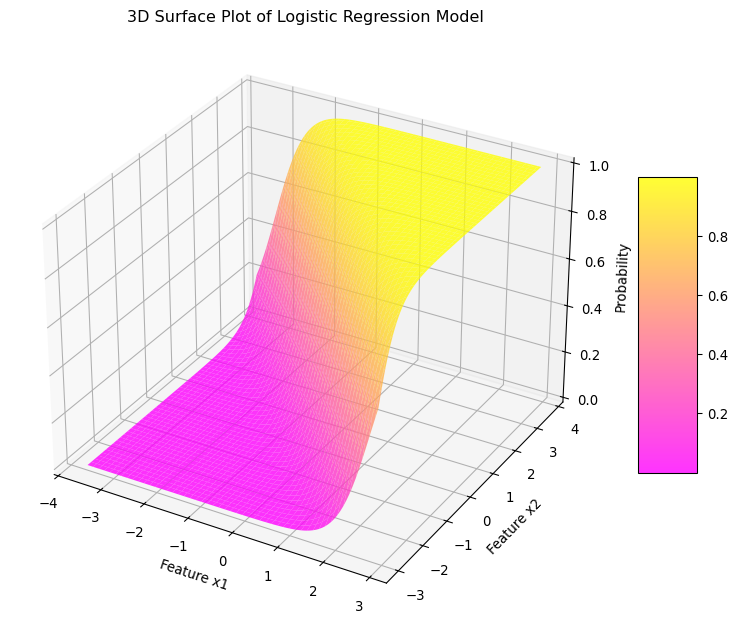

In [19]:
# --- Approach 1: 3D Surface Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(xx1, xx2, probs, cmap='spring', alpha=0.8)
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Probability')
ax.set_title('3D Surface Plot of Logistic Regression Model')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()

# Prologue

## Summary

In this presentation, we:

-   Derived the **likelihood** and **negative log-likelihood**
    formulations.
-   Illustrated the **geometric interpretation** of decision boundaries
    and weight vectors.
-   **Implemented** logistic regression with **gradient descent** and
    visualized results.

## Next lecture

-   Performance measures and cross-evaluation

## References

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa